# Probabilistic Context Free Grammar

Step 1: Download Files
+ stanford-parser.jar
+ stanford-parser-3.9.2-models.jar
+ chinesePCFG.ser.gz

In [2]:
from urllib.request import urlretrieve
import os

stanford_parser_url = 'http://central.maven.org/maven2/edu/stanford/nlp/stanford-parser/3.9.2/stanford-parser-3.9.2.jar'
stanford_parser_models_url = 'http://central.maven.org/maven2/edu/stanford/nlp/stanford-parser/3.9.2/stanford-parser-3.9.2-models.jar'
chinese_pcfg_url = 'https://github.com/treppo/stanfordparser/raw/master/stanford-parser/models/chinesePCFG.ser.gz'
data_dir = 'data'

urls = [stanford_parser_url, stanford_parser_models_url, chinese_pcfg_url]

for url in urls:
    filename = url.split('/')[-1]
    fullname = os.path.join(data_dir, filename)
    if not os.path.exists(fullname):
        print('Downloading {} from {}'.format(filename, url))
        urlretrieve(url, filename=fullname)

Step 2: Load Model

In [1]:
from nltk.parse import stanford
import os

data_dir = 'data'
parser_fullname = os.path.join(data_dir, 'stanford-parser-3.9.2.jar')
model_fullname = os.path.join(data_dir, 'stanford-parser-3.9.2-models.jar')
pcfg_fullname = os.path.join(data_dir, 'chinesePCFG.ser.gz')

parser = stanford.StanfordParser(path_to_jar=parser_fullname, path_to_models_jar=model_fullname, model_path=pcfg_fullname)

/home/orris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPParser instead.
  if __name__ == '__main__':


Step 3: Use model to parse documents

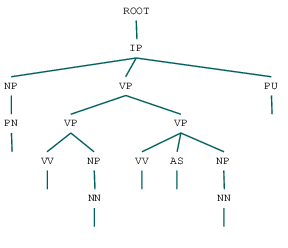

In [14]:
import jieba
import nltk
from IPython.display import display

document = '他骑自行车去了菜市场。'
tokens = jieba.cut(document, cut_all=False, HMM=True)
tokens_str = ' '.join(tokens)
sentence = parser.raw_parse(tokens_str)
for line in sentence:
    line.draw() # 画出来的图应该有Terminal字符的,这行代码会有额外的窗口贴出来,但是jupyter notebook不能完整显示出来
    display(line) # 暂时使用这行代码显示结果


line.draw()显示结果:
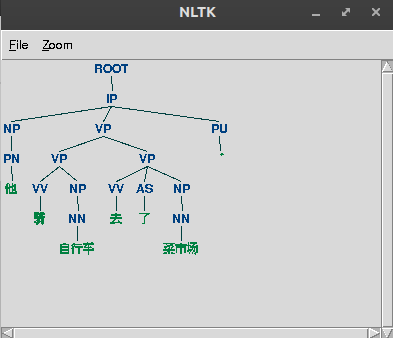